<h1>Importing Libraries</h1>

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

<h1>Loading Data</h1>

In [235]:
df = pd.read_csv('HousingData.csv')

In [236]:
df.shape

(506, 14)

In [237]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8,307,17.4,377.51,NaN,46.7
182,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<h1>Description of Data</h1>

<p>CRIM - per capita crime rate by town</p>
<p>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</p>
<p>INDUS - proportion of non-retail business acres per town.</p>
<p>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</p>
<p>NOX - nitric oxides concentration (parts per 10 million)</p>
<p>RM - average number of rooms per dwelling</p>
<p>AGE - proportion of owner-occupied units built prior to 1940</p>
<p>DIS - weighted distances to five Boston employment centres</p>
<p>RAD - index of accessibility to radial highways</p>
<p>TAX - full-value property-tax rate per $10,000</p>
<p>PTRATIO - pupil-teacher ratio by town</p>
<p>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</p>
<p>LSTAT - % lower status of the population</p>
<p>MEDV - Median value of owner-occupied homes in $1000's</p>

<h1>Data exploration and cleaning</h1>

In [239]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [240]:
df.fillna(df.mean(), inplace=True)

In [289]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [241]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [242]:
correlation = df.corr(numeric_only=True)['MEDV'].sort_values(ascending=False)
print(correlation)

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


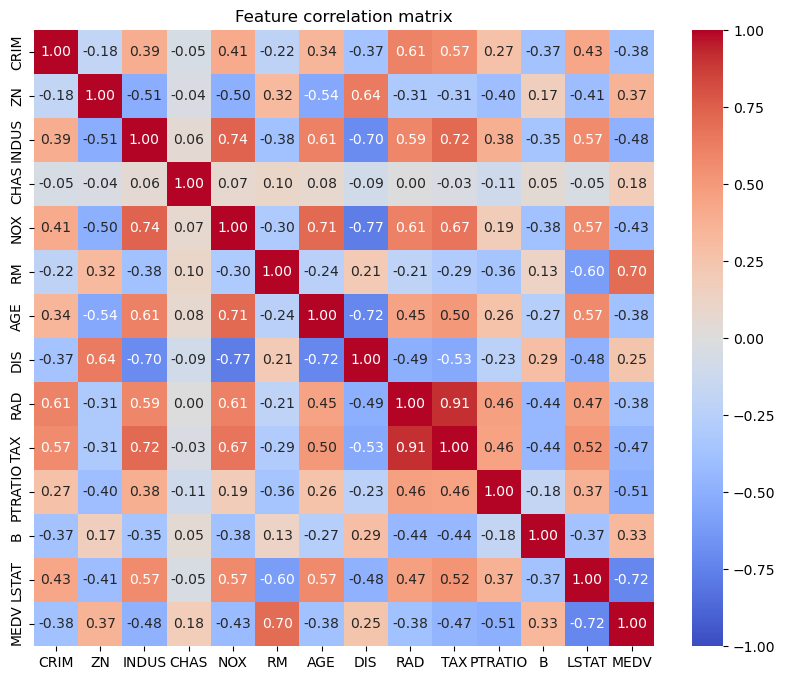

In [243]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature correlation matrix')
plt.show()

In [244]:
df = df.drop('CHAS', axis=1)

In [245]:
df.shape

(506, 13)

In [246]:
df['B'].skew()

np.float64(-2.8903737121414492)

<h1>Spliting data and training model</h1>

In [248]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# scaling
trf_scale = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,10))
])

In [251]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
trf_rf = RandomForestRegressor(
    n_estimators=100,   # Number of trees
    random_state=42,
    n_jobs=-1           # Use all CPU cores for faster training
)


<h2>Writing custom transformer for converting list into array</h2>

In [259]:
from sklearn.base import BaseEstimator, TransformerMixin

class ListToArrayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Nothing to learn here — just return self
        return self

    def transform(self, X):
        X = np.array(X)
        if X.ndim == 1:  # if it’s a single sample
            X = X.reshape(1, -1)
        return X
        
        # Ensure 2D shape for sklearn models
        if X.ndim == 1:
            X = X.reshape(1, -1)
            
        return X

<h1>Create Pipeline</h1>

In [260]:
price_pipeline = Pipeline([
    ('trf_scale', trf_scale),
    ('list_to_array', ListToArrayTransformer()),
    ('trf_rf', trf_rf),
])

In [261]:
#display pipeline
from sklearn import set_config
set_config(display='diagram')

In [262]:
price_pipeline.fit(X_train, y_train)

Pipeline(steps=[('trf_scale',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('list_to_array', ListToArrayTransformer()),
                ('trf_rf', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [266]:
y_pred = price_pipeline.predict(X_test)

In [267]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y_pred)

In [268]:
print(mse)

15.645376372549027


In [269]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(price_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

<h1>Validating Mean squared error</h1>

In [270]:
mse_scores = -score
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

MSE scores for each fold: [12.78234198 36.45666984 23.80606948 16.03168121 24.58471936]
Average MSE: 22.732296373734574


<h1>Validating R2 score</h1>

In [271]:
r2_score = price_pipeline.score(X_test, y_test)
print("R² Score:", r2_score)

R² Score: 0.7866552672136802


In [274]:
sample = X_test.iloc[3].values.reshape(1, -1)
print("Actual:", y_test.iloc[3])
print("Predicted:", price_pipeline.predict(sample)[0])

Actual: 22.8
Predicted: 22.408000000000012


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [291]:
values = X_test.iloc[2]
testing = values.tolist()
val = [testing]
val

[[0.10574,
  0.0,
  27.74,
  0.609,
  5.983,
  98.8,
  1.8681,
  4.0,
  711.0,
  20.1,
  390.11,
  18.07]]

<h3>Predicting with list for testing purpose</h3>

In [285]:
sample = val
print("Actual:", y_test.iloc[4])
print("Predicted:", price_pipeline.predict(sample)[0])

Actual: 16.1
Predicted: 18.377000000000013


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<h1>Exporting Pipeline</h1>

In [217]:
import pickle

In [218]:
pickle.dump(price_pipeline, open('price_pipeline.pkl', 'wb'))